<div><img style="float: right; width: 120px; vertical-align:middle" src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/EU_Informatica/ETSI%20SIST_INFORM_COLOR.png" alt="ETSISI logo" />


# Clasificación de dígitos con un perceptrón multicapa<a id="top"></a>

<i><small>Autores: Alberto Díaz Álvarez y Guillermo Iglesias Hernández<br>Última actualización: 2023-09-28</small></i></div>
                                                  

***

## Introducción

La clasificación de imágenes es una de las tareas más fundamentales y desafiantes en el campo del aprendizaje automático y la visión por computador. El conjunto de datos MNIST (del inglés _Modified National Institute of Standards and Technology database_) es un gran conjunto de imágenes de dígitos manuscritos que ha servido como base para la investigación en reconocimiento de patrones y aprendizaje automático. Contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba, cada una de ellas de 28x28 píxeles en escala de grises, representando dígitos del 0 al 9.

Dada la simplicidad relativa (en comparación con imágenes más complejas) y el tamaño del conjunto de datos MNIST, es un punto de partida ideal para cualquier persona que quiera comenzar a trabajar en el mundo del aprendizaje automático y la clasificación de imágenes. A pesar de que existen modelos más avanzados como las redes neuronales convolucionales que han demostrado un rendimiento excepcional en tareas similares, en esta ocasión, nos centraremos en el uso de un perceptrón multicapa (MLP, del inglés _Multilayer Perceptron_) para la tarea de clasificación.

Un perceptrón multicapa es una red neuronal artificial _feedforward_ que consiste en al menos tres capas de nodos: una capa de entrada, una o más capas ocultas y una capa de salida. A pesar de su estructura simple en comparación con otros tipos de redes neuronales, los MLP son capaces de aprender y modelar funciones no lineales, lo que los hace adecuados para una variedad de tareas, incluida la clasificación de imágenes.

## Objetivos

Vamos a por ello. En esta práctica tenemos los siguientes objetivos:

1. **Descargar y explorar el conjunto de datos MNIST**: Antes de la creación del modelo, es esencial familiarizarnos con el conjunto de datos, entender su estructura y visualizar algunas de las imágenes contenidas en él.
2. **Preprocesamiento de datos**: Transformación los datos en un formato adecuado para alimentar el modelo, lo que incluye la normalización y la codificación _one-hot_ de las etiquetas.
3. **Construir un perceptrón multicapa**: Diseño y construcción de un MLP usando bibliotecas populares de aprendizaje profundo. Experimentar con diferentes estructuras y parámetros para encontrar un diseño óptimo.
4. **Entrenamiento del modelo**: Utilizar el conjunto de entrenamiento de MNIST para entrenar nuestro perceptrón multicapa, monitorizando su rendimiento en el conjunto de validación para evitar el sobreajuste.
5. **Evaluación del modelo**: Una vez entrenado, evaluar el rendimiento del MLP en el conjunto de prueba de MNIST para determinar su precisión y capacidad de generalización en datos no vistos.
6. **Optimización (si es necesario)**: Basándonos en los resultados, realizar ajustes en el modelo o en el proceso de entrenamiento para mejorar el rendimiento.

Al final de este notebook, esperamos tener un modelo de perceptrón multicapa que pueda clasificar con precisión los dígitos manuscritos del conjunto de datos MNIST y adquirir una comprensión sólida de los pasos involucrados en la construcción y entrenamiento de un MLP para tareas de clasificación.

# Bibliotecas y configuración

A continuación importaremos las bibliotecas que se utilizarán a lo largo del _notebook_.

In [1]:
import numpy as np

from matplotlib import pyplot as plt
# from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

2023-09-28 17:59:22.604719: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 17:59:22.646530: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-28 17:59:22.646560: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-28 17:59:22.646584: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-28 17:59:22.652735: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 17:59:22.653155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

***

# Load dataset

Utilizaremos el conjunto de datos *mnist*, el cual consta de imágenes de 28x28 píxeles de dígitos del 0-9 manuscritos.

Este dataset es probablemente el más común para hacer este tipo de pruebas sencillas, pues presenta un problema relativamente sencillo y fácil de estudiar.

El dataset lo descargaremos usando la función *load_data()* de *keras*.

In [ ]:
# Rellenar para cargar el dataset usando la funcion load_data()
 (trainX, trainY), (testX, testY) =

11490434/11490434 [==============================] - 1s 0us/step


Originalmente los valores de los píxeles de las imágenes están en el rango [0, 255].

Para ayudar al procesamiento de las redes de neuronas vamos a **normalizar** estos valores, pasándolos al rango [0, 1].

Esto se consigue símplente dividiendo cada **numpy array** entre 255.

In [ ]:
# Normalizar el dataset para que las imagenes esten en el rango [0, 1]

Otra parte importante es preprocesar las etiquetas de los datos. Estas etiquetas son números del 0-9 que representan el número de cada imagen.

Vamos a realizar lo que se conoce como un **One-hot encoding**. Esto consiste en pasar del valor numérico a un **vector binario** que represente el mismo valor, de la siguiente manera:

* 0 = [1,0,0,0,0,0,0,0,0,0]
* 1 = [0,1,0,0,0,0,0,0,0,0]
* 2 = [0,0,1,0,0,0,0,0,0,0]
* ...
* 9 = [0,0,0,0,0,0,0,0,0,1]

Para ello usamos la clase *LabelBinarizer* de sklearn.

In [ ]:
# Realizar el one-hot-encoding de los datos

Ahora podemos observar el dataset

In [ ]:
print("Train X dataset shape: ", np.shape(trainX))
print("Train y dataset shape: ", np.shape(trainY))
print("Test X dataset shape: ", np.shape(testX))
print("Test y dataset shape: ", np.shape(testY))

Train X dataset shape:  (60000, 28, 28)
Train y dataset shape:  (60000, 10)
Test X dataset shape:  (10000, 28, 28)
Test y dataset shape:  (10000, 10)


In [ ]:
def show_examples(X, y_real, y_pred):
    fig, ax = plt.subplots(1, 5, figsize=[25, 5])

    for i, img in enumerate(X[:5]):
        ax[i].imshow(img, cmap='Greys')
        ax[i].set_title('y real: ' + str(y_real[i]) +
                        '\ny predicted: ' + str(y_pred[i]))
    plt.show()

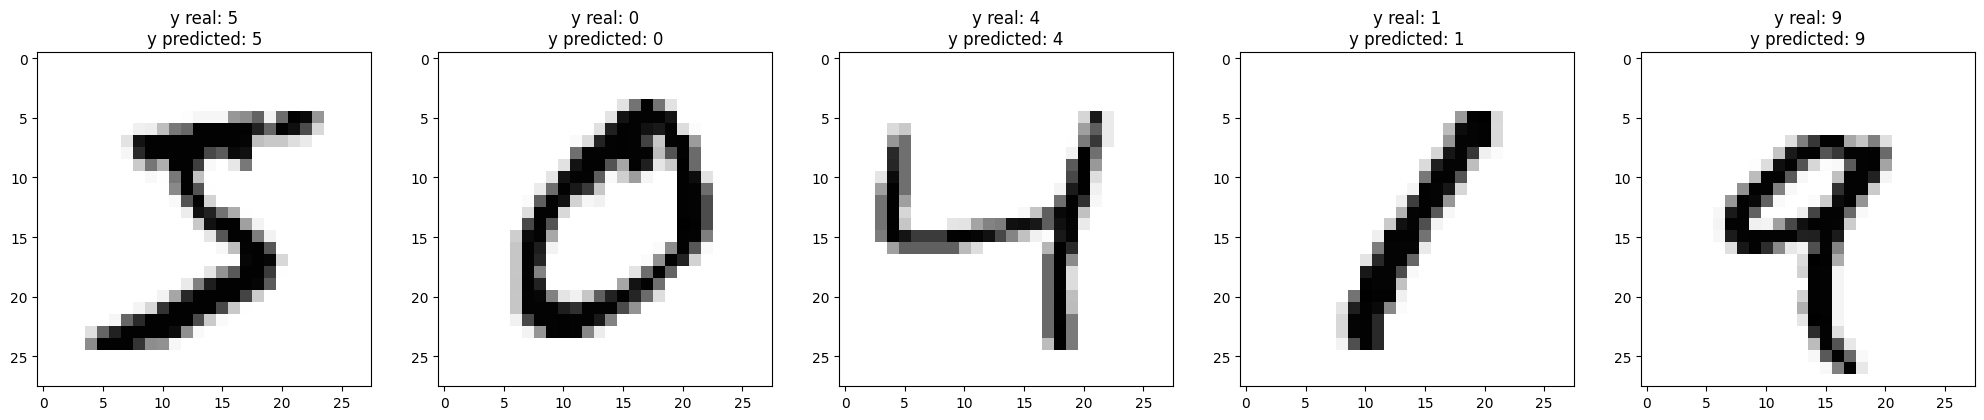

In [ ]:
show_examples(trainX, train_labels, train_labels)

# Model definition

Creamos el modelo de red de neuronas. Para ello usaremos la **API funcional** de keras.

De esta manera nuestro modelo comienza con una capa de **Input**, dicha capa se conecta con las posteriores a través de una variable (en este caso llamada x). Aquí es donde definimos las distintas capas:

* **Flatten**: Para pasar de la imágen bidimensional a un vector unidimensional que pueda ser procesado por nuestro perceptrón.
* **Dense**: Corresponde con las capas densas de nuestra red, formadas por el número de neuronas que se le indique como primer parámetro. Por otra parte se especifica la función de activación de cada capa.

Por último, para crear el objeto del modelo de redes neuronales se usa la función **Model(*input, output*)**. Esta función devuelve la red de neuronas indicando la entrada y salida de la misma.

In [ ]:
# Definir una función para crear nuestro modelo de redes de neuronas simple

def create_classifier():

El método *summary()* y la función *plot_model()* sirven para observar la red de neuronas creada.

In [ ]:
model = create_classifier()
model.summary()
plot_model(model, show_shapes=True, show_layer_names=False)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 10)                290       
                                                                 
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


Compilamos con la función de pérdida deseada, en este caso *categorical_crossentropy* al ser una situación de clasificación multiclase

In [ ]:
# Rellenar la función de pérdida correspondiente
model.compile(loss=, metrics=['accuracy'])

# Train model

Se entrena el modelo con los parámetros deseados, en este caso 20 epochs, con batch size de 128 imágenes.

In [ ]:
# Rellenar la funcion fit con los parámetros necesarios
history = model.fit(verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4805 - accuracy: 0.8741 - val_loss: 0.2777 - val_accuracy: 0.9224
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2547 - accuracy: 0.9291 - val_loss: 0.2233 - val_accuracy: 0.9380
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2135 - accuracy: 0.9401 - val_loss: 0.1983 - val_accuracy: 0.9443
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1872 - accuracy: 0.9473 - val_loss: 0.1793 - val_accuracy: 0.9499
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1682 - accuracy: 0.9521 - val_loss: 0.1675 - val_accuracy: 0.9523
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1540 - accuracy: 0.9564 - val_loss: 0.1592 - val_accuracy: 0.9542
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9599 - val_loss: 0.1522 - val_accuracy: 0.9566
Epoch 

# Evaluate the model

Mostramos la gráfica de pérdidas y métrica de accuracy de nuestro entrenamiento.

In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

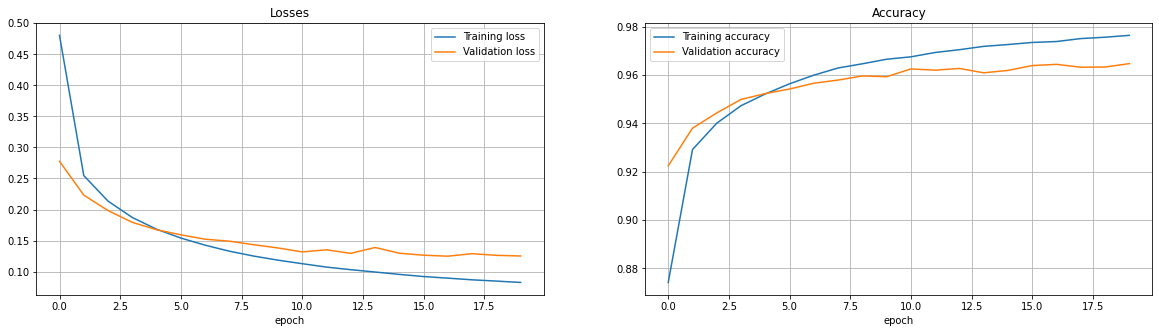

In [ ]:
plot_losses(history.history)

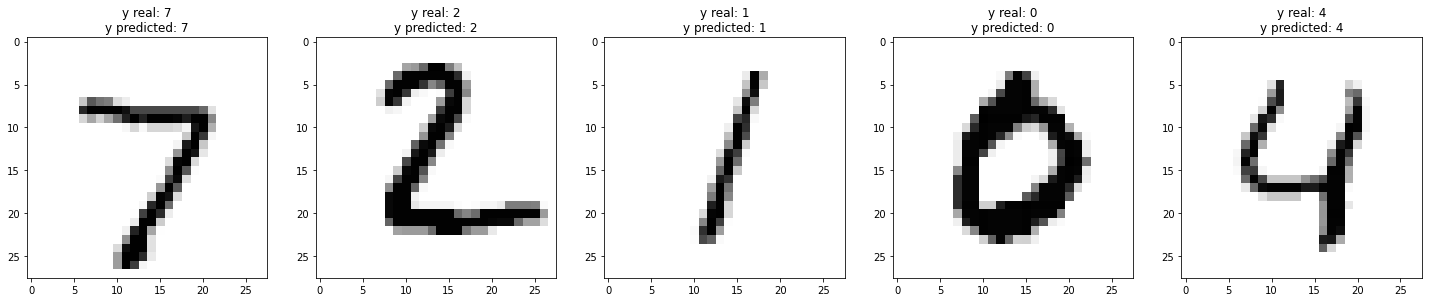

In [ ]:
y_pred = model.predict(testX[:5]).argmax(axis=-1)

show_examples(testX[:5], test_labels[:5], y_pred)

---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">